In [1]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib notebook

## Background:

This final project analyzes two sets of data. 

1. One set of data is related to the testing of thermocouples and the important fields are the thermoelectric voltages that each thermocouple generates, the hot and cold thermocouple junction temperatures and also the seebeck coefficients for each thermocouple.

    The other set of data is related to the testing of a piezoresistive strain gage and the important field is the resistance of the strain gage.


2. Both sets of data were collected by me.


3. Both sets of data were collected using a 24bit data aquisition system. Both sets of data just contain voltage or resistance readings from each respective test. Below is an example of the strain gage testing. The strain gages in this video are the small black serpentine resistors and they were deposited on a special shaped aluminum oxide substrate. When the are flexed they respond with a change in resistance that is proportional to the applied force. These are very useful devices used in the aerospace industry where determination of applied forces is important but the environments are very harsh and hot.<font color="red"> Lower the video volume before playing the embedded video</font>.

<video src="straingage.mp4" width="720" height="480" controls preload></video>

*Video description*: Two thin film strain gages deposited on a 'constant' strain beam are stressed using an aluminum oxide rod mounted on a motor fixture. The beam itself is clamped down to a set of carbon steel pieces to keep it stationary at one end and free floating at another.


Both data sets are also shown in the cell below.

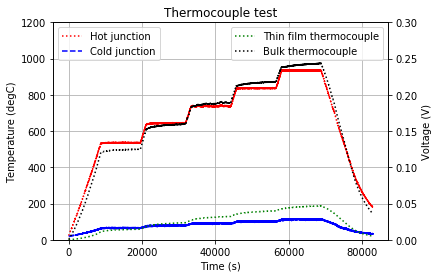

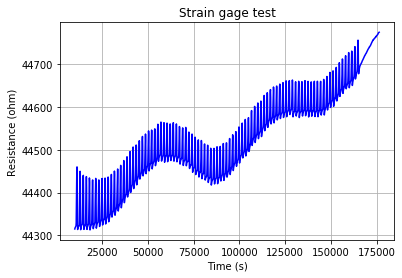

In [2]:
ThermoelectricData = pd.read_csv("../dataset/CSC 593 dataset (thermoelectric).csv")
StrainData = pd.read_csv("../dataset/CSC 593 dataset (temp + strain).csv")

TimeTC = ThermoelectricData['Time']                                #Assigning the 'Time' variable from the thermocouple dataset to a list.
TFVoltage = ThermoelectricData['Thin film TC']                     #Assigning the 'Thin film TC' variable from the thermocouple dataset to a list.
BVoltage = ThermoelectricData['Bulk TC']                           #Assigning the 'Bulk TC' variable from the thermocouple dataset to a list.
HotT = ThermoelectricData['Hot junction (degC)']                   #Assigning the 'Hot junction (degC)' variable from thermocouple the dataset to a list.
ColdT = ThermoelectricData['Cold junction (degC)']                 #Assigning the 'Cold junction (degC)' variable from the thermocouple dataset to a list.

TimeSG = StrainData['Time']                                        #Assigning the 'Time' variable from the strain gage dataset to a list.
Resistance = StrainData['Resistance']                              #Assigning the 'Resistance' variable from the strain gage dataset to a list.


#Temperature versus time is plotted.
fig, ax1 = plt.subplots()                                          #Blank figure created for double y axis plot.
ax1.set_xlabel("Time (s)")                                         #The xlabel name is set.
ax1.set_ylabel("Temperature (degC)")                               #The left y label name is set.
ax1.plot(TimeTC, HotT, 'r:', label = 'Hot junction')               #The hot junction temperature is plotted along with the system time.
ax1.plot(TimeTC, ColdT, 'b--', label = 'Cold junction')            #The cold junction temperature is plotted along with the system time.
ax1.set_ylim([0, 1200])                                            #The left y-axis limit is constrained to get a good view of the data.

#Voltage versus time is plotted
ax2 = ax1.twinx()                                                  #Second axis is instantiates that shares the same x-axis as the one above.
ax2.set_ylabel("Voltage (V)")                                      #we already handled the x-label with ax1
ax2.plot(TimeTC, TFVoltage, 'g:', label = 'Thin film thermocouple')#The thin film thermocouple voltage is plotted along with the system time.
ax2.plot(TimeTC, BVoltage, 'k:', label = 'Bulk thermocouple')      #The bulk thermocouple voltage is plotted along with the system time.
ax2.set_ylim([0, 0.3])                                             #The right y-axis limit is constrained to get a good view of the data.
ax1.legend(loc = 'upper left')                                     #A legend is set for the hot and cold junction temperature plotted variables.
ax2.legend(loc = 'upper right')                                    #A legend is set for the thin film a bulk thermocouple voltage plotted variables.
ax1.set_title('Thermocouple test')                                 #The plot title is set.
ax1.grid()                                                         #A grid is added to the plot.
plt.show()                                                         #The plot is displayed

#Resistance versus time is plotted.
plt.figure()                                                       #A blank figure is generated.
plt.plot(TimeSG, Resistance, 'b')                                  #The data is plotted on the figure.
plt.xlabel('Time (s)')                                             #The x label name is set.
plt.ylabel('Resistance (ohm)')                                     #The y lable name is set.
plt.title('Strain gage test')                                      #The plot title is set.
plt.grid()                                                         #A grid is added to the plot.

#ThermoelectricData.head()                                          #Displays the first five data points for each data field of the thermocouple dataset.
#ThermoelectricData.describe()                                      #Displays the statistics for each data field of the thermocouple dataset.
#StrainData.head()                                                  #Displays the first five data points for each data field of the strain gage dataset.
#StrainData.describe()                                              #Displays the statistics for each data field of the strain gage dataset.

***Graph 1***: The first graph shows the thermoelectric response of two thermocouples and the hot and cold junction temperatures all on the same graph.

***Graph 2***: The third graph shows the piezoresistive response of a semiconductor strain gage as it is mechanically deflected. Each oscillation corresponds the strain gage experiencing a mechanical force and then relaxing.

## Data processing:

1. The data is loaded using pandas and more specifically the read_csv() method with the proper directory path. For example the thermocouple data was loaded by using:
 
```python
   ThermoelectricData = pd.read_csv("../dataset/CSC 593 dataset (thermoelectric).csv")
```

2. The data did not have to be cleaned and the data aquisition system recorded the data as floating point numbers so no preparation was required beyond assigning data fields to list variables for plotting. An example of this type of data field to list assignment:

```python
    HotT = ThermoelectricData['Hot junction (degC)']
```

## Analysis:


### Question 1. Is the relationship between voltage and temperature linear or nonlinear?

Thin film thermocouple voltage sample table of data

0    0.000029
1    0.000032
2    0.000030
3    0.000029
4    0.000029
Name: Thin film TC, dtype: float64 

Bulk thermocouple voltage sample table of data

0    0.000626
1    0.000619
2    0.000622
3    0.000621
4    0.000615
Name: Bulk TC, dtype: float64 

Thin film thermocouple voltage stats

count    82927.000000
mean         0.025998
std          0.013728
min          0.000027
25%          0.014051
50%          0.026686
75%          0.038592
max          0.046852
Name: Thin film TC, dtype: float64 


Bulk thermocouple voltage stats

count    82927.000000
mean         0.161408
std          0.062729
min          0.000606
25%          0.124018
50%          0.163771
75%          0.216084
max          0.243568
Name: Bulk TC, dtype: float64 



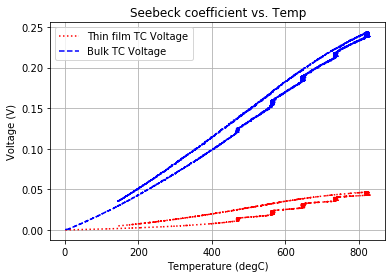

In [3]:
plt.figure()                                                          #A blank figure is generated.
plt.plot((HotT-ColdT),TFVoltage, 'r:', label = 'Thin film TC Voltage')#First set of data is plotted on the figure.
plt.plot((HotT-ColdT),BVoltage, 'b--', label = 'Bulk TC Voltage')     #Second set of data is plotted on the figure.
plt.xlabel('Temperature (degC)')                                      #The x label name is set.
plt.ylabel('Voltage (V)')                                             #The y lable name is set.
plt.legend(loc = 'upper left')                                        #A legend is added to the top left of the plot.
plt.title('Seebeck coefficient vs. Temp')                             #The plot title is set.
plt.grid()                                                            #A grid is added to the plot.

print("Thin film thermocouple voltage sample table of data\n")        #Print statement with newline at the end.
print(TFVoltage.head(),"\n")                                          #Print statement that displays the first five data points of the thin film thermocouple voltage.
print("Bulk thermocouple voltage sample table of data\n")             #Print statement with newline at the end.
print(BVoltage.head(),"\n")                                           #Print statement that displays the first five data points of the bulk thermocouple voltage.
print("Thin film thermocouple voltage stats\n")                       #Print statement with newline at the end.
print(TFVoltage.describe(),"\n\n")                                    #Print statement that displays statistics of the thin film thermocouple voltage.
print("Bulk thermocouple voltage stats\n")                            #Print statement with newline at the end.
print(BVoltage.describe(),"\n")                                       #Print statement that displays statistics of the bulk thermocouple voltage.

***This graph shows the thermoelectric voltage of each thermocouple measured and recorded using a data aquisition system as a function of temperature. When these thermocouples are heated up they produce a voltage and the question seeks to ask if this voltage being generated has a linear or nonlinear relationship with temperature.***

***From the plot above when the stair case portions are ignored, it can be seen that the ramp up and down voltages for each thermocouple have a linear relationship with temperature between the 200 - 700C and this is an interesting find. Below 200C and above 700C a slight nonlinear behavior can be seen.***

***From the tables above a sample of voltage data can be seen for each thermocouple as well as a summary of various statistics. Normally as statistical analysis is not done for a single data file as was done here but instead after testing many thermocouple samples to get a better understanding of their reliability.***

### Question 2. Is the relationship between seebeck coefficient and temperature linear or nonlinear?

Thin film thermocouple Seebeck coefficient sample table of data

0    0.463539
1    0.512211
2    0.487905
3    0.463865
4    0.463540
Name: Seebeck thin, dtype: float64 

Bulk thermocouple Seebeck coefficient sample table of data

0    10.063680
1     9.951535
2     9.989874
3     9.985312
4     9.892934
Name: Seebeck bulk, dtype: float64 

Thin film thermocouple Seebeck coefficient stats

count    82927.000000
mean        37.836241
std         13.076641
min          0.427246
25%         27.414743
50%         41.162469
75%         49.054677
max         54.903606
Name: Seebeck thin, dtype: float64 


Bulk thermocouple Seebeck coefficient stats

count    82927.000000
mean       245.858000
std         39.911771
min          9.746417
25%        234.446509
50%        259.803017
75%        271.743328
max        281.447848
Name: Seebeck bulk, dtype: float64 



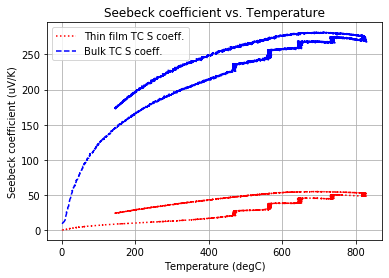

In [4]:
SeebeckTF = ThermoelectricData['Seebeck thin']                            #Assigning the 'Seebeck thin' variable from the thermocouple dataset to a list.
SeebeckB = ThermoelectricData['Seebeck bulk']                             #Assigning the 'Seebeck bulk' variable from the thermocouple dataset to a list.

plt.figure()                                                              #A blank figure is generated.
plt.plot((HotT-ColdT),SeebeckTF, 'r:', label = 'Thin film TC S coeff.')   #First set of data is plotted on the figure.
plt.plot((HotT-ColdT),SeebeckB, 'b--', label = 'Bulk TC S coeff.')        #Second set of data is plotted on the figure.
plt.xlabel('Temperature (degC)')                                          #The x label name is set.
plt.ylabel('Seebeck coefficient (uV/K)')                                  #The y lable name is set.
plt.legend(loc = 'upper left')                                            #A legend is added to the top left of the plot.
plt.title('Seebeck coefficient vs. Temperature')                          #The plot title is set.
plt.grid()                                                                #A grid is added to the plot.

print("Thin film thermocouple Seebeck coefficient sample table of data\n")#Print statement with newline at the end.
print(SeebeckTF.head(),"\n")                                              #Print statement that displays the first five data points of the thin film thermocouple seebeck coefficient.
print("Bulk thermocouple Seebeck coefficient sample table of data\n")     #Print statement with newline at the end.
print(SeebeckB.head(),"\n")                                               #Print statement that displays the first five data points of the bulk thermocouple seebeck coefficient.
print("Thin film thermocouple Seebeck coefficient stats\n")               #Print statement with newline at the end.
print(SeebeckTF.describe(),"\n\n")                                        #Print statement that displays statistics of the thin film thermocouple voltage.
print("Bulk thermocouple Seebeck coefficient stats\n")                    #Print statement with newline at the end.
print(SeebeckB.describe(),"\n")                                           #Print statement that displays statistics of the bulk thermocouple voltage.

***This graph shows the Seebeck coefficient of each thermocouple calculated as a function of temperature. When these thermocouples are heated they not only produce a voltage but also have a characteristic Seebeck coefficient which describes the relationship between the voltage produced as the temperature difference between the hot and cold junctions. The question seeks to ask if the Seebeck coefficient has a linear or nonlinear relationship with the temperature gradient and voltage produce. Seebeck coefficient (S) is calculated as follows:***
$$S = \frac{V}{T(hot) - T(cold)}$$
***Where V is the voltage produce by the thermocouple, T(hot) is the hot junction temperature and T(cold) is the cold junction temperature.***

***From the plot above when the stair case portions are ignored, it can be seen that the ramp up and down voltages for each thermocouple have a highly nonlinear linear behavior. This is also an interesting result because the plot above shows a nearly linear behavior but the reason for this is that as the thermocouples are heated up they produce larger voltages but the rate of increase begins to diminish.***

***From the tables above a sample of Seebeck coefficient data can be seen for each thermocouple as well as a summary of various statistics. Normally as statistical analysis is not done for a single data file as was done here but instead after testing many thermocouple samples to get a better understanding of their reliability.***

### Question 3. What is the maximum gage factor for the strain gage tested?

Strain gage resistance sample table of data

0    44314.78
1    44316.98
2    44318.20
3    44318.94
4    44319.90
Name: Resistance, dtype: float64 

Strain gage resistance statistics

count     1499.000000
mean     44522.372475
std        112.410829
min      44312.600000
25%      44443.820000
50%      44508.500000
75%      44597.200000
max      44774.360000
Name: Resistance, dtype: float64 



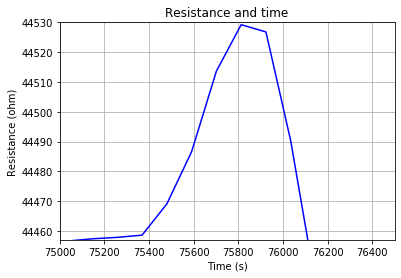

In [5]:
StrainData = pd.read_csv("../dataset/CSC 593 dataset (temp + strain).csv")

#Resistance versus time is plotted.
plt.figure()                                                    #A blank figure is generated.
plt.plot(TimeSG, Resistance, 'b')                                             #The data is plotted on the figure.
plt.xlabel('Time (s)')                                          #The x label name is set.
plt.ylabel('Resistance (ohm)')                                  #The y lable name is set.
plt.title('Resistance and time')                                #The plot title is set.
plt.xlim([75000, 76500])                                        #The plot x-axis is constrained to view one oscillation.
plt.ylim([44457, 44530])                                        #The plot y-axis is contrained to view one oscillation.
plt.grid()                                                      #A grid is added to the plot.

print("Strain gage resistance sample table of data\n")          #Print statement with newline at the end.
print(Resistance.head(),"\n")                                   #Print statement that displays the first five data points of the strain gage
print("Strain gage resistance statistics\n")                    #Print statement with newline at the end.
print(Resistance.describe(),"\n")                               #Print statement that displays statistics of the strain gage.

***This graph shows a zoomed in view of one of the oscillations from the strain gage plot above. Gage factor is determined using the baseline and largest value.***:

***This graph shows the change in resistance as a function of time. An example of this is shown in the video above. The strain gage starts off with a certain electrical resistance value and as pressure is applied to the strain gage its value changes because of a microscopic change in geometry as well as bending of the valence and conduction bands which govern the electrical performance of the strain gage. This change of resistance along with the strain applied can be used to calculate a value called the gage factor and this value is a measure of a strain gages sensitivity to an applied force. Gage factor (GF) can be calculated as follows:***
$$GF = \frac{R(final)-R(initial)}{R(initial} * \frac{1}{\epsilon}$$
***Where R(initial) is the initial resistance measured at before an oscillation begins, R(final) is the resistance measured at the peak of an oscillation and $\epsilon$ is the applied strain which is highly controllable.***

***From the plot above R(initial) is ~44450$\Omega$, R(final) is 44530$\Omega$ and the applied strain was 250$\mu\epsilon$. The maximum gage factor from this test is shown below:***
$$\frac{44530\Omega-44450\Omega}{44450\Omega} * \frac{1}{250\mu\epsilon} = 7.2$$


***From the tables above a sample of resistance data can be seen for the strain gage as well as a summary of various statistics. Normally as statistical analysis is not done for a single data file as was done here but instead after testing many strain gage samples to get a better understanding of their reliability.***

## References
1. https://github.com/etianen/html5media/wiki/embedding-video
2. https://stackoverflow.com/questions/11509830/how-to-add-color-to-githubs-readme-md-file
3. https://help.github.com/en/github/writing-on-github/creating-and-highlighting-code-blocks
4. https://www.markdownguide.org/extended-syntax/
5. https://matplotlib.org/gallery/api/two_scales.html
6. https://www.tutorialspoint.com/python_pandas/python_pandas_descriptive_statistics.htm
7. https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html
8. https://chaonan99.github.io/2016/how-to-add-equation-on-github-markdown-file/
9. https://github.com/cben/mathdown/wiki/math-in-markdown
10. https://stackoverflow.com/questions/11256433/how-to-show-math-equations-in-general-githubs-markdownnot-githubs-blog